## Module 7 Lecture Notebook
#### Generalized Linear Models

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression

In [2]:
bikeshare = pd.read_csv('Bikeshare.csv', index_col=0)
bikeshare.reset_index(drop=True, inplace=True)
bikeshare

,season,mnth,day,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,bikers
0,1,Jan,1,0,0,6,0,clear,0.24,0.2879,0.81,0.0000,3,13,16
1,1,Jan,1,1,0,6,0,clear,0.22,0.2727,0.80,0.0000,8,32,40
2,1,Jan,1,2,0,6,0,clear,0.22,0.2727,0.80,0.0000,5,27,32
3,1,Jan,1,3,0,6,0,clear,0.24,0.2879,0.75,0.0000,3,10,13
4,1,Jan,1,4,0,6,0,clear,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8640,1,Dec,365,19,0,6,0,clear,0.42,0.4242,0.54,0.2239,19,73,92
8641,1,Dec,365,20,0,6,0,clear,0.42,0.4242,0.54,0.2239,8,63,71
8642,1,Dec,365,21,0,6,0,clear,0.40,0.4091,0.58,0.1940,2,50,52
8643,1,Dec,365,22,0,6,0,clear,0.38,0.3939,0.62,0.1343,2,36,38


## Modeling bikers using predictors mnth, hr, workingday, temp, and weathersit

Set up regresion

<AxesSubplot:xlabel='hr', ylabel='bikers'>

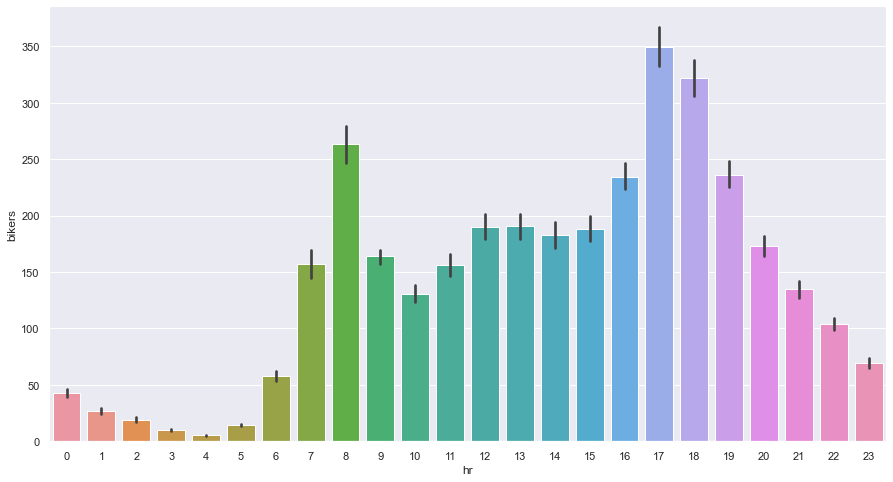

In [8]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.barplot(x = "hr", y = "bikers", data = bikeshare)

In [10]:
X = pd.get_dummies(bikeshare[['mnth', 'hr', 'weathersit']].astype('str'), drop_first = True)
X = X.join(bikeshare[['workingday', 'temp']])
y = bikeshare['bikers']
X.columns

Index(['mnth_Aug', 'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_July',
       'mnth_June', 'mnth_March', 'mnth_May', 'mnth_Nov', 'mnth_Oct',
       'mnth_Sept', 'hr_1', 'hr_10', 'hr_11', 'hr_12', 'hr_13', 'hr_14',
       'hr_15', 'hr_16', 'hr_17', 'hr_18', 'hr_19', 'hr_2', 'hr_20', 'hr_21',
       'hr_22', 'hr_23', 'hr_3', 'hr_4', 'hr_5', 'hr_6', 'hr_7', 'hr_8',
       'hr_9', 'weathersit_cloudy/misty', 'weathersit_heavy rain/snow',
       'weathersit_light rain/snow', 'workingday', 'temp'],
      dtype='object')

Run regression and inspect selected coefficients

In [11]:
lrmodel1 = LinearRegression(fit_intercept = True)
lrmodel1.fit(X,y)
lrmodel1_coefs = pd.DataFrame(lrmodel1.coef_, columns = ['Coefficients'], index = X.columns)
lrmodel1_coefs.loc[['workingday', 'temp', 'weathersit_cloudy/misty', 'weathersit_heavy rain/snow', 
                    'weathersit_light rain/snow']]

,Coefficients
workingday,1.269601
temp,157.209366
weathersit_cloudy/misty,-12.890266
weathersit_heavy rain/snow,-109.744577
weathersit_light rain/snow,-66.494365


Plot month coefficients

In [12]:
coef_df = pd.DataFrame(lrmodel1.coef_, columns = ['Coefficients'], index = X.columns)
coef_df = coef_df.loc['mnth_Aug': 'mnth_Sept']
coef_df = coef_df.reset_index()
coef_df = coef_df.rename(columns = {'index' : 'Month'})
coef_df['Month'] = coef_df['Month'].str.replace('mnth_', '')
coef_df

,Month,Coefficients
0,Aug,11.818134
1,Dec,5.032765
2,Feb,-34.579704
3,Jan,-41.424907
4,July,3.899553
5,June,26.393842
6,March,-24.873469
7,May,31.132177
8,Nov,18.885096
9,Oct,34.409345


<AxesSubplot:xlabel='Month', ylabel='Coefficients'>

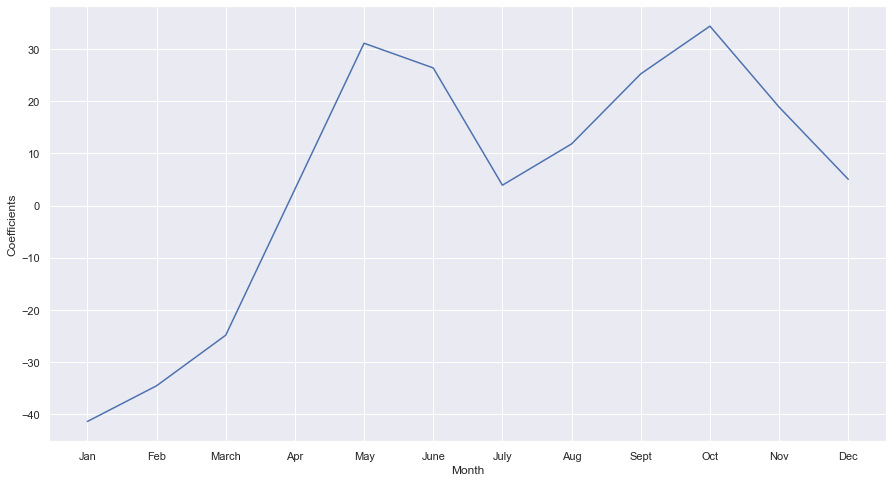

In [13]:
coef_df['Month'] = pd.Categorical(coef_df['Month'],
                                   categories=['Jan', 'Feb', 'March', 'Apr', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec'],
                                   ordered=True)
sns.lineplot(data = coef_df, x = 'Month', y = 'Coefficients')

Plot hour coefficients

In [14]:
coef_df = pd.DataFrame(lrmodel1.coef_, columns = ['Coefficients'], index = X.columns)
coef_df = coef_df.loc['hr_1': 'hr_9']
coef_df
coef_df = coef_df.reset_index()
coef_df = coef_df.rename(columns = {'index' : 'Hour'})
coef_df['Hour'] = coef_df['Hour'].str.replace('hr_', '')
coef_df

,Hour,Coefficients
0,1,-14.579267
1,10,83.801338
2,11,105.423449
3,12,137.283722
4,13,136.035900
5,14,126.636071
6,15,132.086516
7,16,178.520619
8,17,296.266991
9,18,269.440916


<AxesSubplot:xlabel='Hour', ylabel='Coefficients'>

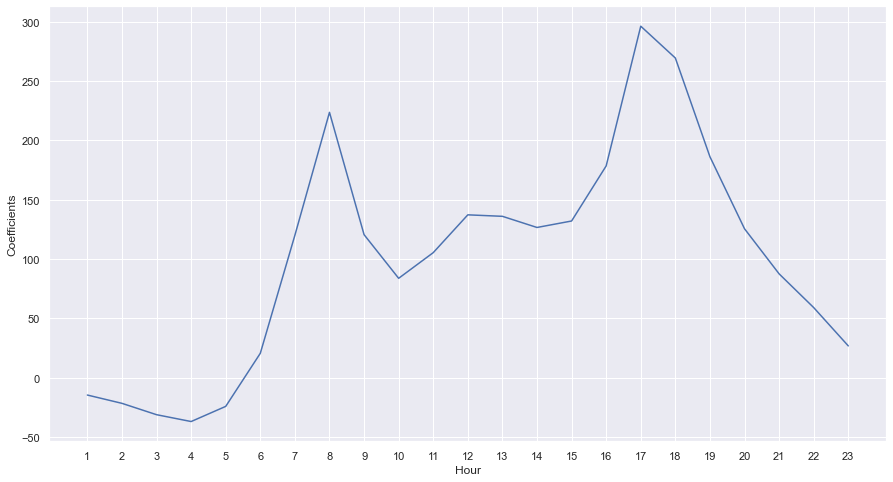

In [15]:
coef_df['Hour'] = pd.Categorical(coef_df['Hour'],
                                   categories=['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
                                              '13', '14','15','16','17','18','19','20','21','22','23'],
                                   ordered=True)
sns.lineplot(data = coef_df, x = 'Hour', y = 'Coefficients')

[Text(0.5, 0, 'y_hat')]

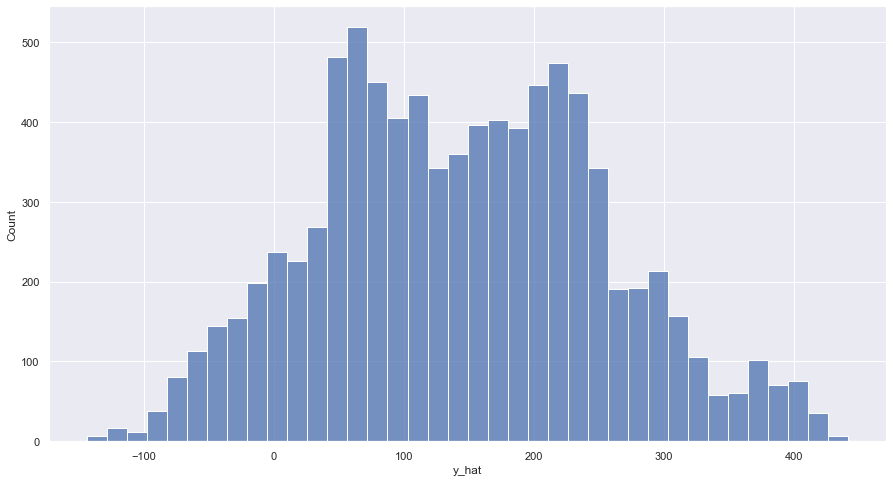

In [16]:
y_hat = lrmodel1.predict(X)
sns.histplot(y_hat).set(xlabel = 'y_hat')

[Text(0.5, 0, 'y_hat'), Text(0, 0.5, 'Residuals')]

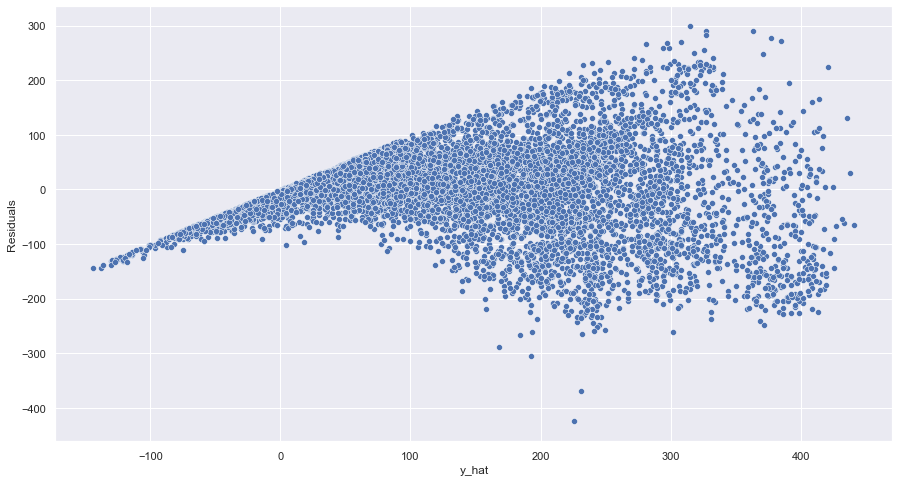

In [17]:
sns.scatterplot(x = y_hat, y = y_hat-y).set(xlabel = 'y_hat', ylabel = 'Residuals')

Try transforming the resonse variable

<AxesSubplot:xlabel='bikers', ylabel='Count'>

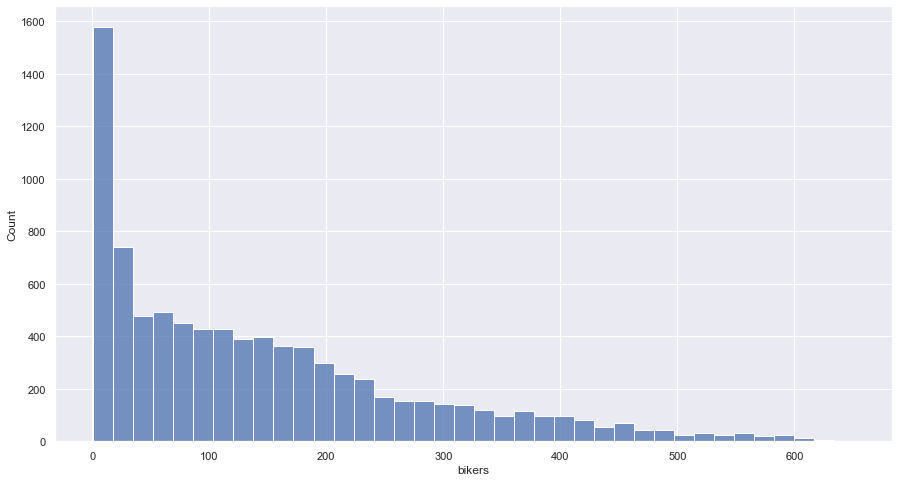

In [18]:
sns.histplot(y)

[Text(0.5, 0, 'log(y)')]

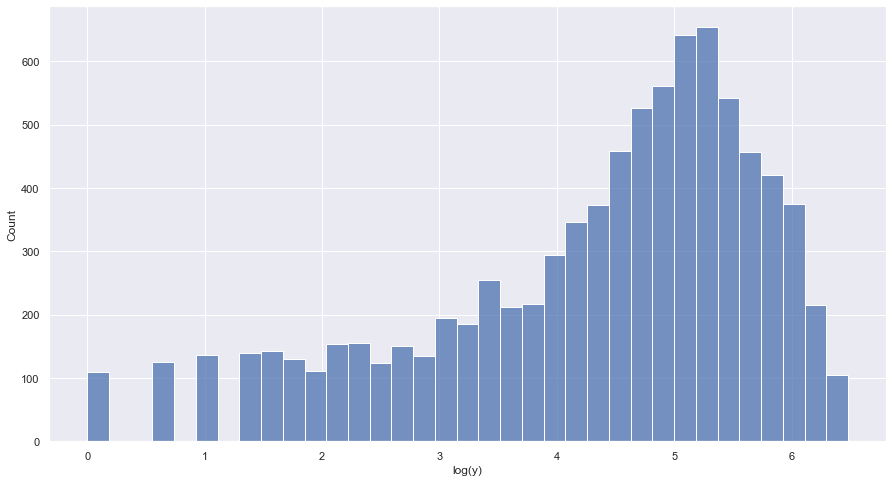

In [19]:
sns.histplot(np.log(y)).set(xlabel = 'log(y)')

In [21]:
lrmodel2 = LinearRegression(fit_intercept = True)
lrmodel2.fit(X,np.log(y))
y_log_hat = lrmodel2.predict(X)

[Text(0.5, 0, 'y_hat')]

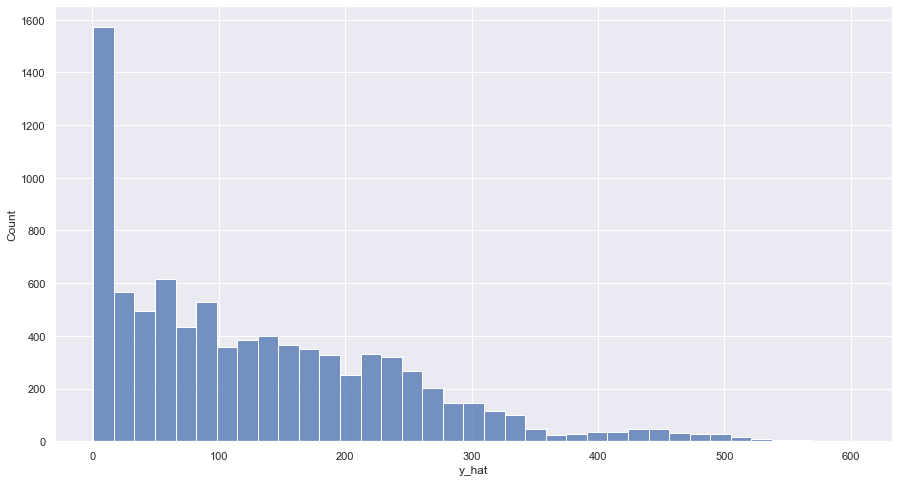

In [22]:
sns.histplot(np.exp(y_log_hat)).set(xlabel = 'y_hat')

[Text(0.5, 0, 'y_hat'), Text(0, 0.5, 'Residuals')]

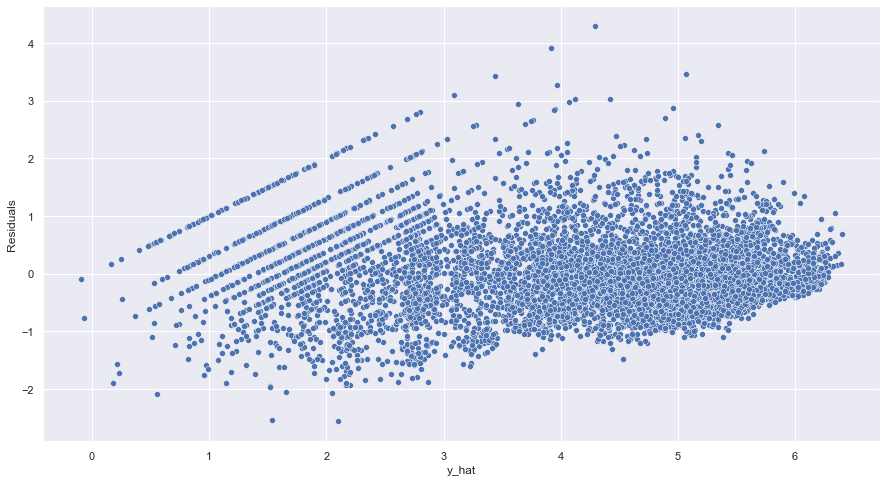

In [23]:
sns.scatterplot(x = y_log_hat, y = y_log_hat-np.log(y)).set(xlabel = 'y_hat', ylabel = 'Residuals')

### Poisson regression

In [25]:
from sklearn.linear_model import PoissonRegressor
prmodel_1 = PoissonRegressor()
prmodel_1.fit(X,y)
prmodel1_coefs_df = pd.DataFrame(prmodel_1.coef_, columns = ['Coefficients'], index = X.columns)
prmodel1_coefs_df.loc[['workingday', 'temp', 'weathersit_cloudy/misty', 'weathersit_heavy rain/snow', 
                    'weathersit_light rain/snow']]

,Coefficients
workingday,0.011061
temp,0.919983
weathersit_cloudy/misty,-0.063318
weathersit_heavy rain/snow,-0.006610
weathersit_light rain/snow,-0.491935


In [26]:
prmodel_1.intercept_

4.191501499376311

In [27]:
prmodel1_coefs_df = prmodel1_coefs_df.loc['mnth_Aug': 'mnth_Sept']
prmodel1_coefs_df = prmodel1_coefs_df.reset_index()
prmodel1_coefs_df = prmodel1_coefs_df.rename(columns = {'index' : 'Month'})
prmodel1_coefs_df['Month'] = prmodel1_coefs_df['Month'].str.replace('mnth_', '')
prmodel1_coefs_df

,Month,Coefficients
0,Aug,0.103355
1,Dec,0.020473
2,Feb,-0.363544
3,Jan,-0.528285
4,July,0.053468
5,June,0.172278
6,March,-0.252456
7,May,0.200459
8,Nov,0.132527
9,Oct,0.232547


<AxesSubplot:xlabel='Month', ylabel='Coefficients'>

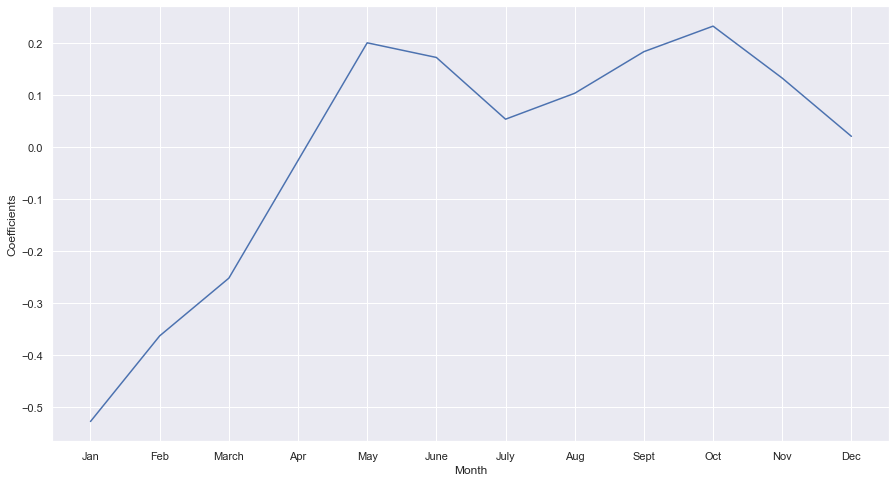

In [28]:
prmodel1_coefs_df['Month'] = pd.Categorical(prmodel1_coefs_df['Month'],
                                   categories=['Jan', 'Feb', 'March', 'Apr', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec'],
                                   ordered=True)
sns.lineplot(data = prmodel1_coefs_df, x = 'Month', y = 'Coefficients')

<AxesSubplot:xlabel='Hour', ylabel='Coefficients'>

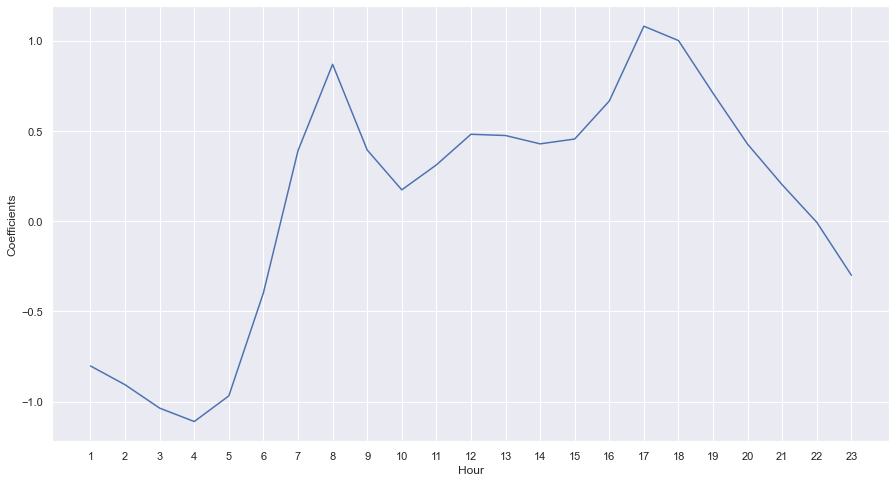

In [29]:
prmodel1_coefs_df = pd.DataFrame(prmodel_1.coef_, columns = ['Coefficients'], index = X.columns)
prmodel1_coefs_df = prmodel1_coefs_df.loc['hr_1': 'hr_9']
prmodel1_coefs_df
prmodel1_coefs_df = prmodel1_coefs_df.reset_index()
prmodel1_coefs_df = prmodel1_coefs_df.rename(columns = {'index' : 'Hour'})
prmodel1_coefs_df['Hour'] = prmodel1_coefs_df['Hour'].str.replace('hr_', '')
prmodel1_coefs_df['Hour'] = pd.Categorical(prmodel1_coefs_df['Hour'],
                                   categories=['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
                                              '13', '14','15','16','17','18','19','20','21','22','23'],
                                   ordered=True)
sns.lineplot(data = prmodel1_coefs_df, x = 'Hour', y = 'Coefficients')